In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Advertising.csv')

In [3]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
df.shape

(200, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [6]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

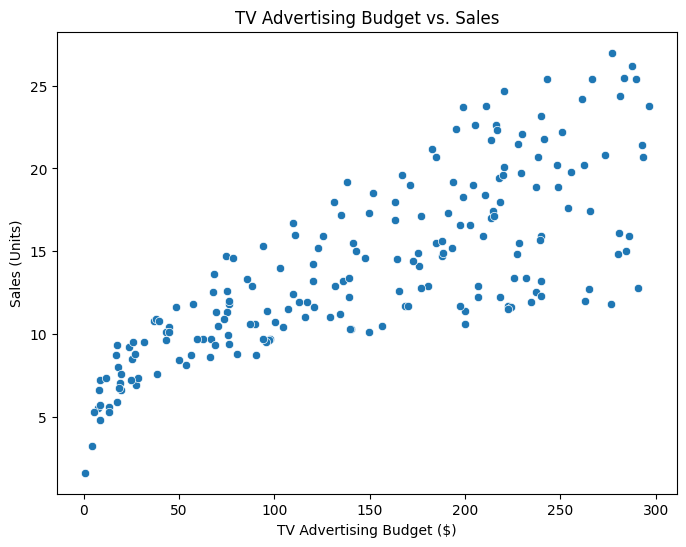

In [7]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='TV', y='Sales', data=df)
plt.title('TV Advertising Budget vs. Sales')
plt.xlabel('TV Advertising Budget ($)')
plt.ylabel('Sales (Units)')
plt.show()


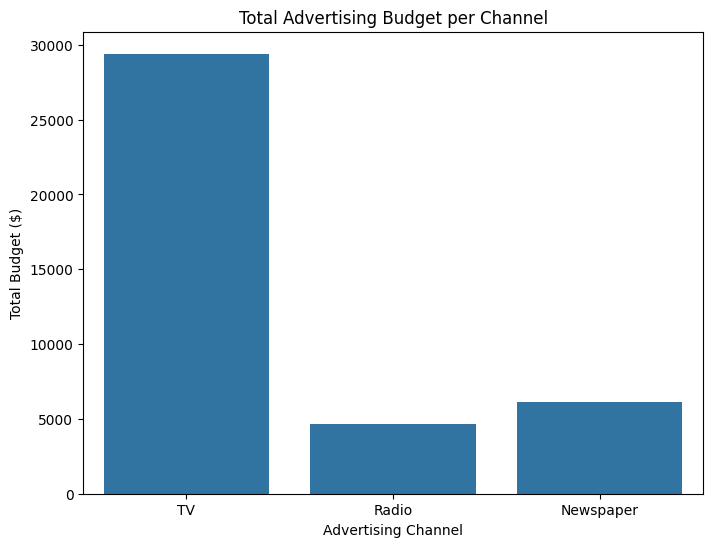

In [17]:
# Calculate total budget per channel
total_budget = df[['TV', 'Radio', 'Newspaper']].sum().reset_index()
total_budget.columns = ['Advertising Channel', 'Total Budget ($)']

plt.figure(figsize=(8, 6))
sns.barplot(x='Advertising Channel', y='Total Budget ($)', data=total_budget)
plt.title('Total Advertising Budget per Channel')
plt.xlabel('Advertising Channel')
plt.ylabel('Total Budget ($)')
plt.show()


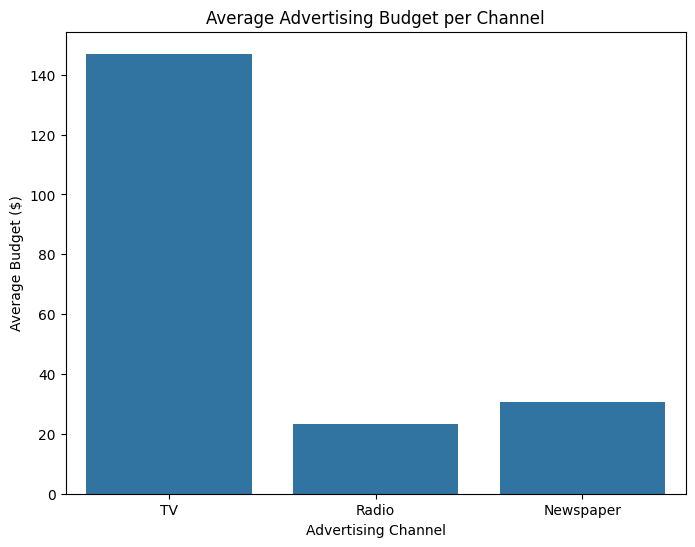

In [16]:
# Calculate average budget per channel
average_budget = df[['TV', 'Radio', 'Newspaper']].mean().reset_index()
average_budget.columns = ['Advertising Channel', 'Average Budget ($)']

plt.figure(figsize=(8, 6))
sns.barplot(x='Advertising Channel', y='Average Budget ($)', data=average_budget)
plt.title('Average Advertising Budget per Channel')
plt.xlabel('Advertising Channel')
plt.ylabel('Average Budget ($)')
plt.show()


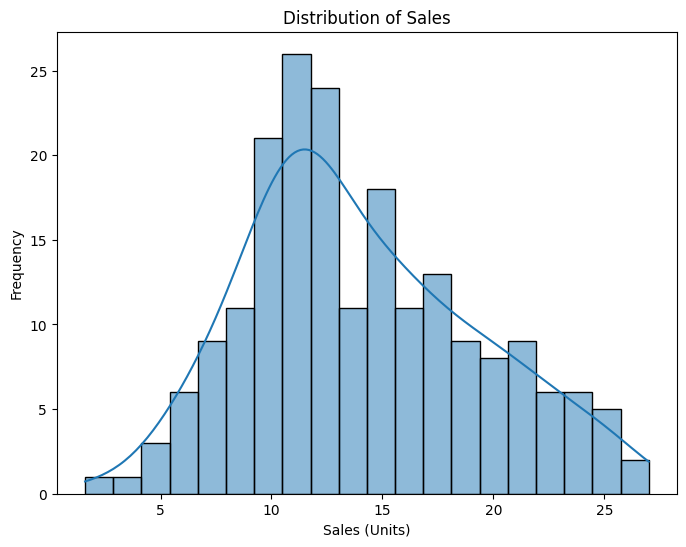

In [15]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Sales'], bins=20, kde=True)
plt.title('Distribution of Sales')
plt.xlabel('Sales (Units)')
plt.ylabel('Frequency')
plt.show()


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

X = df[['TV', 'Radio', 'Newspaper']] 
y = df['Sales'] 

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




# Linear Regression

In [25]:
# Initialize the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

# Coefficients and Intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Mean Squared Error: 3.17
R² Score: 0.90
Coefficients: [0.04472952 0.18919505 0.00276111]
Intercept: 2.9790673381226256


# Decision Tree Regressor

In [26]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(max_depth=4, random_state=42)

# Train the model
regressor.fit(X_train, y_train)

# Predict on the test set
y_pred = regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error (MSE): 3.33
Mean Absolute Error (MAE): 1.37
R² Score: 0.89
